# Connecting to Drive

In [9]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading Dataset

In [10]:
# Dataset Paths
dataset_path = '/content/drive/My Drive/Titanic/titanic.csv'

# Load the datasets
data = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
print(data.head())

# Display basic information about the dataset
print(data.info())

# Display summary statistics
print(data.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

# Check for missing values

In [13]:

# Check for missing values in each column
missing_values = data.isnull().sum()

# Displaying missing vales
print(missing_values)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Handling Missing Values

In [14]:
# Handling missing values
# Cabin: Fill with 'Unknown'
data['Cabin'].fillna('Unknown', inplace=True)

# Age: Fill with median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Embarked: Fill with mode (most common value)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Verify no missing values are left
print(data.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


# Correct DataTypes

In [16]:
# Check initial data types
print(data.dtypes)

# Correct data types
data['Survived'] = data['Survived'].astype('category')
data['Pclass'] = data['Pclass'].astype('category')
data['Sex'] = data['Sex'].astype('category')
data['Embarked'] = data['Embarked'].astype('category')

# For the 'Age', 'Fare', 'SibSp', and 'Parch' columns, we can keep them as integers or floats
data['Age'] = data['Age'].astype('float')  # In case of any missing values filled
data['Fare'] = data['Fare'].astype('float')
data['SibSp'] = data['SibSp'].astype('int')
data['Parch'] = data['Parch'].astype('int')

# After correcting data types, check them again
print(data.dtypes)

# Remove duplicates if any
data.drop_duplicates()

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object
PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA

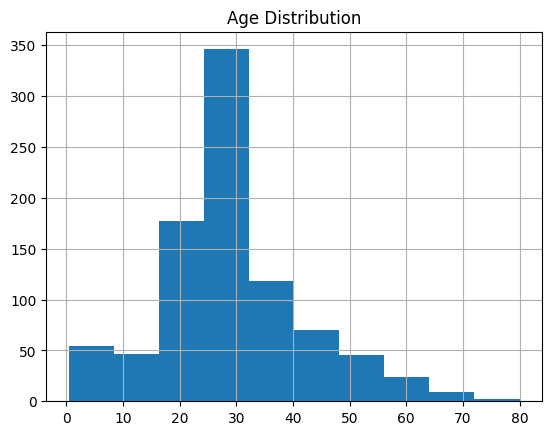

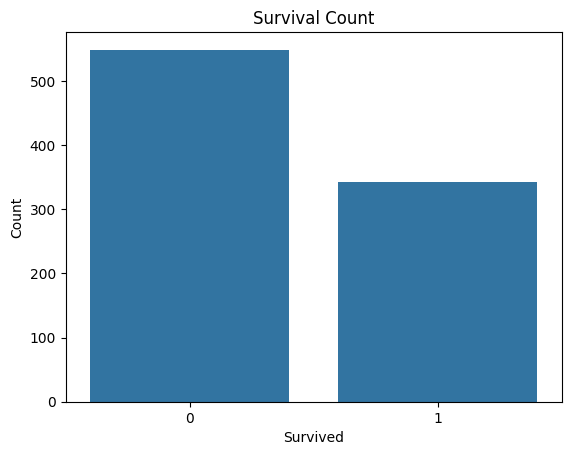

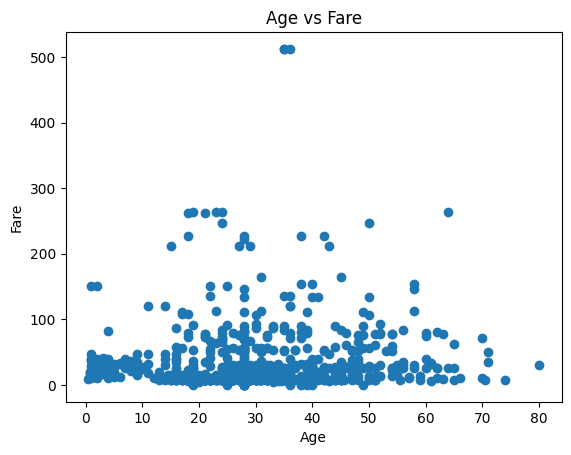

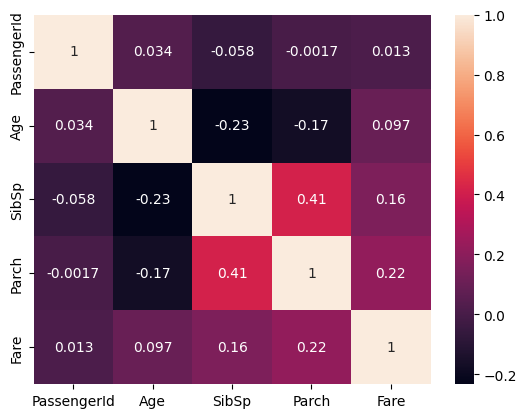

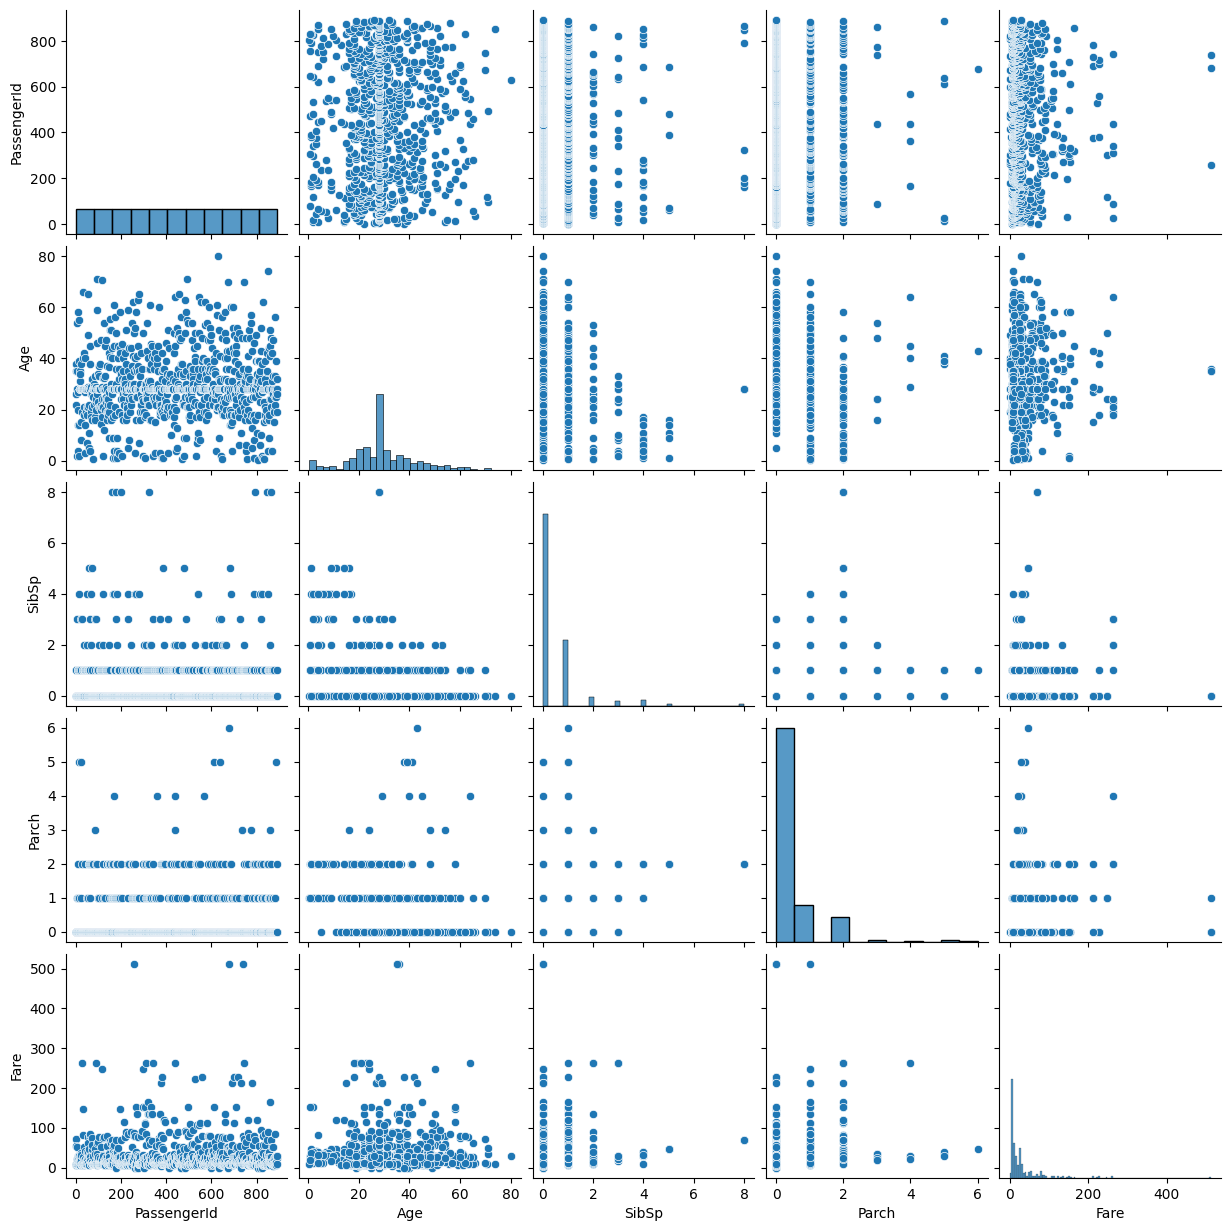

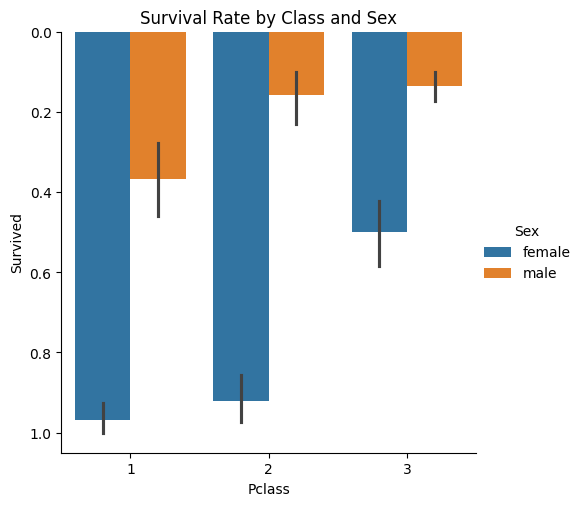

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis
# Histograms
data['Age'].hist()
plt.title('Age Distribution')
plt.show()

# Bar plots
sns.countplot(x='Survived', data=data)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count')
plt.show()

# Bivariate Analysis
# Scatter plot
plt.scatter(data['Age'], data['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.show()

# Select only numerical columns for correlation
numerical_data = data.select_dtypes(include=['number'])

# Correlation matrix
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Pair plot
sns.pairplot(numerical_data) # Use numerical_data for pairplot as well
plt.show()

# Multivariate Analysis
# Survival rate by sex and class
sns.catplot(x="Pclass", y="Survived", hue="Sex", kind="bar", data=data)
plt.title('Survival Rate by Class and Sex')
plt.show()